# Problem Statement

Five million Americans are currently living with heart diseases, and the numbers are expected to rise. It is very important to understand the factors which causes Heart-attacks so that certain precaution can be taken by individuals.
In-order to understand the reasons of the Heart-attack, a data was collected from various hospitals across US which is given in US_Heart_Patients.csv. In the data set there are Heart-Att indicates whether the person suffered from Heart attack or not.

Perform EDA on the data and build a model which will predict whether the person will suffer from Heart-attack or not.


## Importing required packages and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
chd_df = pd.read_csv("US_Heart_Patients.csv")

## Checking the data

In [4]:
chd_df.head(10) 

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,Female,43.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,Female,63.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,Female,45.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,Male,52.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,Male,43.0,1.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [5]:
chd_df.shape

(4240, 16)

In [6]:
chd_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
Gender             4232 non-null object
age                4238 non-null float64
education          4130 non-null float64
currentSmoker      4237 non-null float64
cigsPerDay         4209 non-null float64
BP Meds            4180 non-null float64
prevalentStroke    4231 non-null float64
prevalentHyp       4238 non-null float64
diabetes           4238 non-null float64
tot cholesterol    4180 non-null float64
Systolic BP        4236 non-null float64
Diastolic BP       4235 non-null float64
BMI                4216 non-null float64
heartRate          4236 non-null float64
glucose            3849 non-null float64
Heart-Att          4240 non-null int64
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


Gender column is of type object i.e. strings. This need to be converted to ordinal type for building RF model

# EDA

### Summary of the data

In [7]:
chd_df.describe(include="all")

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
count,4232,4238.000000,4130.000000,4237.000000,4209.000000,4180.000000,4231.000000,4238.000000,4238.000000,4180.000000,4236.000000,4235.000000,4216.000000,4236.000000,3849.000000,4240.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,49.579283,1.979903,0.494218,9.001901,0.029665,0.005909,0.310524,0.025720,236.677273,132.362370,82.901889,25.798916,75.867800,81.951936,0.151887
std,NaN,8.572875,1.019943,0.500026,11.920742,0.169682,0.076650,0.462763,0.158316,44.616098,22.039244,11.914467,4.075256,11.999488,23.958428,0.358953
min,NaN,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,NaN,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,NaN,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.395000,75.000000,78.000000,0.000000
75%,NaN,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000


### Frequency of the levels in the Gender column

In [8]:
# Get the count of Male and Female




Female    2414
Male      1818
Name: Gender, dtype: int64

### Proportion of observations in each of the target classes

In [9]:
chd_df['Heart-Att'].value_counts()

0    3596
1     644
Name: Heart-Att, dtype: int64

In [10]:
# Get the proportion in each class




0    0.848113
1    0.151887
Name: Heart-Att, dtype: float64

### Check for duplicate data

In [11]:
# Are there any duplicates ?




Number of duplicate rows = 0


,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att


There are no duplicates in the data

### Check for missing value in any column

In [12]:
# Are there any missing values ?




Gender               8
age                  2
education          110
currentSmoker        3
cigsPerDay          31
BP Meds             60
prevalentStroke      9
prevalentHyp         2
diabetes             2
tot cholesterol     60
Systolic BP          4
Diastolic BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64

Missing values exists for all the independent varibles with some variables having very high missing values

In [13]:
chd_df.dropna().shape

(3616, 16)

If we were to drop all the observations having missing values, then number of observations reduces from 4240 to 3616 rows for the same 16 columns.

So, we will impute the continuous variables with mean value, and drop the missing values corresponding to categorical variables.

In [14]:
for column in chd_df[['age', 'cigsPerDay', 'tot cholesterol', 'Systolic BP', 'Diastolic BP','BMI','heartRate','glucose']]:
    mean = chd_df[column].mean()
    chd_df[column] = chd_df[column].fillna(mean)

In [15]:
chd_df.isnull().sum()

Gender               8
age                  0
education          110
currentSmoker        3
cigsPerDay           0
BP Meds             60
prevalentStroke      9
prevalentHyp         2
diabetes             2
tot cholesterol      0
Systolic BP          0
Diastolic BP         0
BMI                  0
heartRate            0
glucose              0
Heart-Att            0
dtype: int64

Only categorical variables have misisng values now

In [16]:
chd_df.dropna(inplace=True)
chd_df.shape

(4055, 16)

After removing these missing values, the number of observations is now 4055

### Checking for Outliers

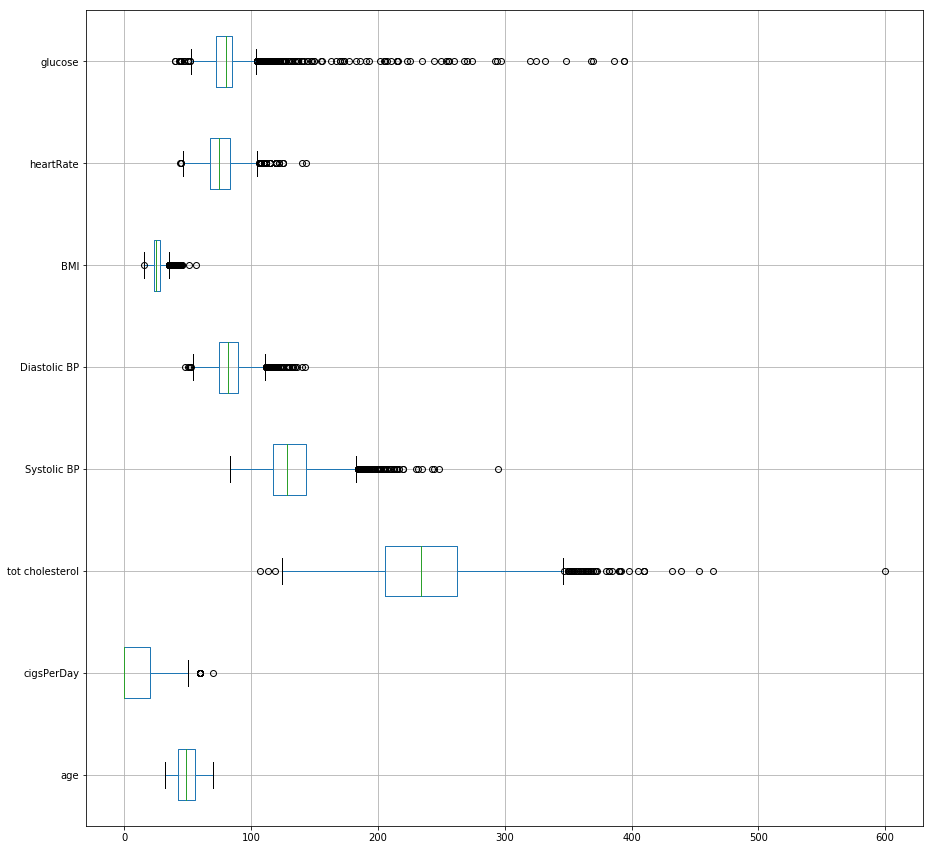

In [17]:
# construct box plot for continuous variables





Outliers exists for most of the continuous variables, and also has many outliers

### Treating the Outliers

In [18]:
# Complete the function to calculate lower_range and upper_range
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1

    
    
    
    return lower_range, upper_range

In [19]:
for feature in chd_df[['age', 'cigsPerDay', 'tot cholesterol', 'Systolic BP', 'Diastolic BP','BMI','heartRate','glucose']]: 
    lr,ur=treat_outlier(chd_df[feature])
    chd_df[feature]=np.where(chd_df[feature]>ur,ur,chd_df[feature])
    chd_df[feature]=np.where(chd_df[feature]<lr,lr,chd_df[feature])

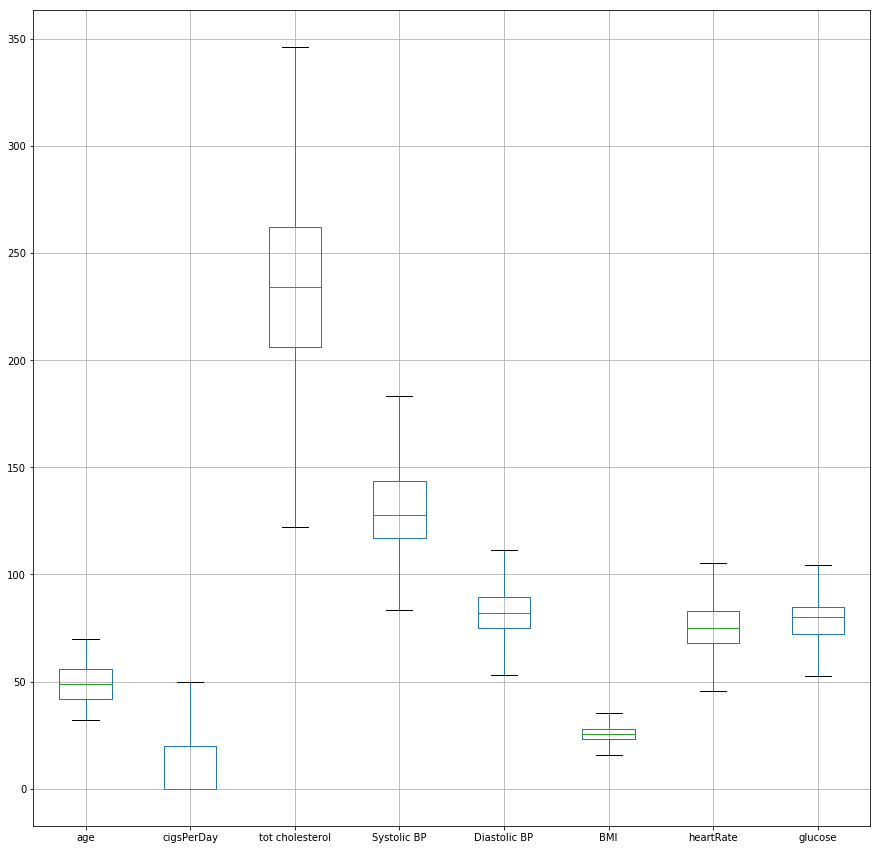

In [20]:
plt.figure(figsize=(15,15))
chd_df[['age', 'cigsPerDay', 'tot cholesterol', 'Systolic BP', 'Diastolic BP','BMI','heartRate','glucose']].boxplot()

There are no outliers after treating them

### Checking pairwise distribution of the continuous variables

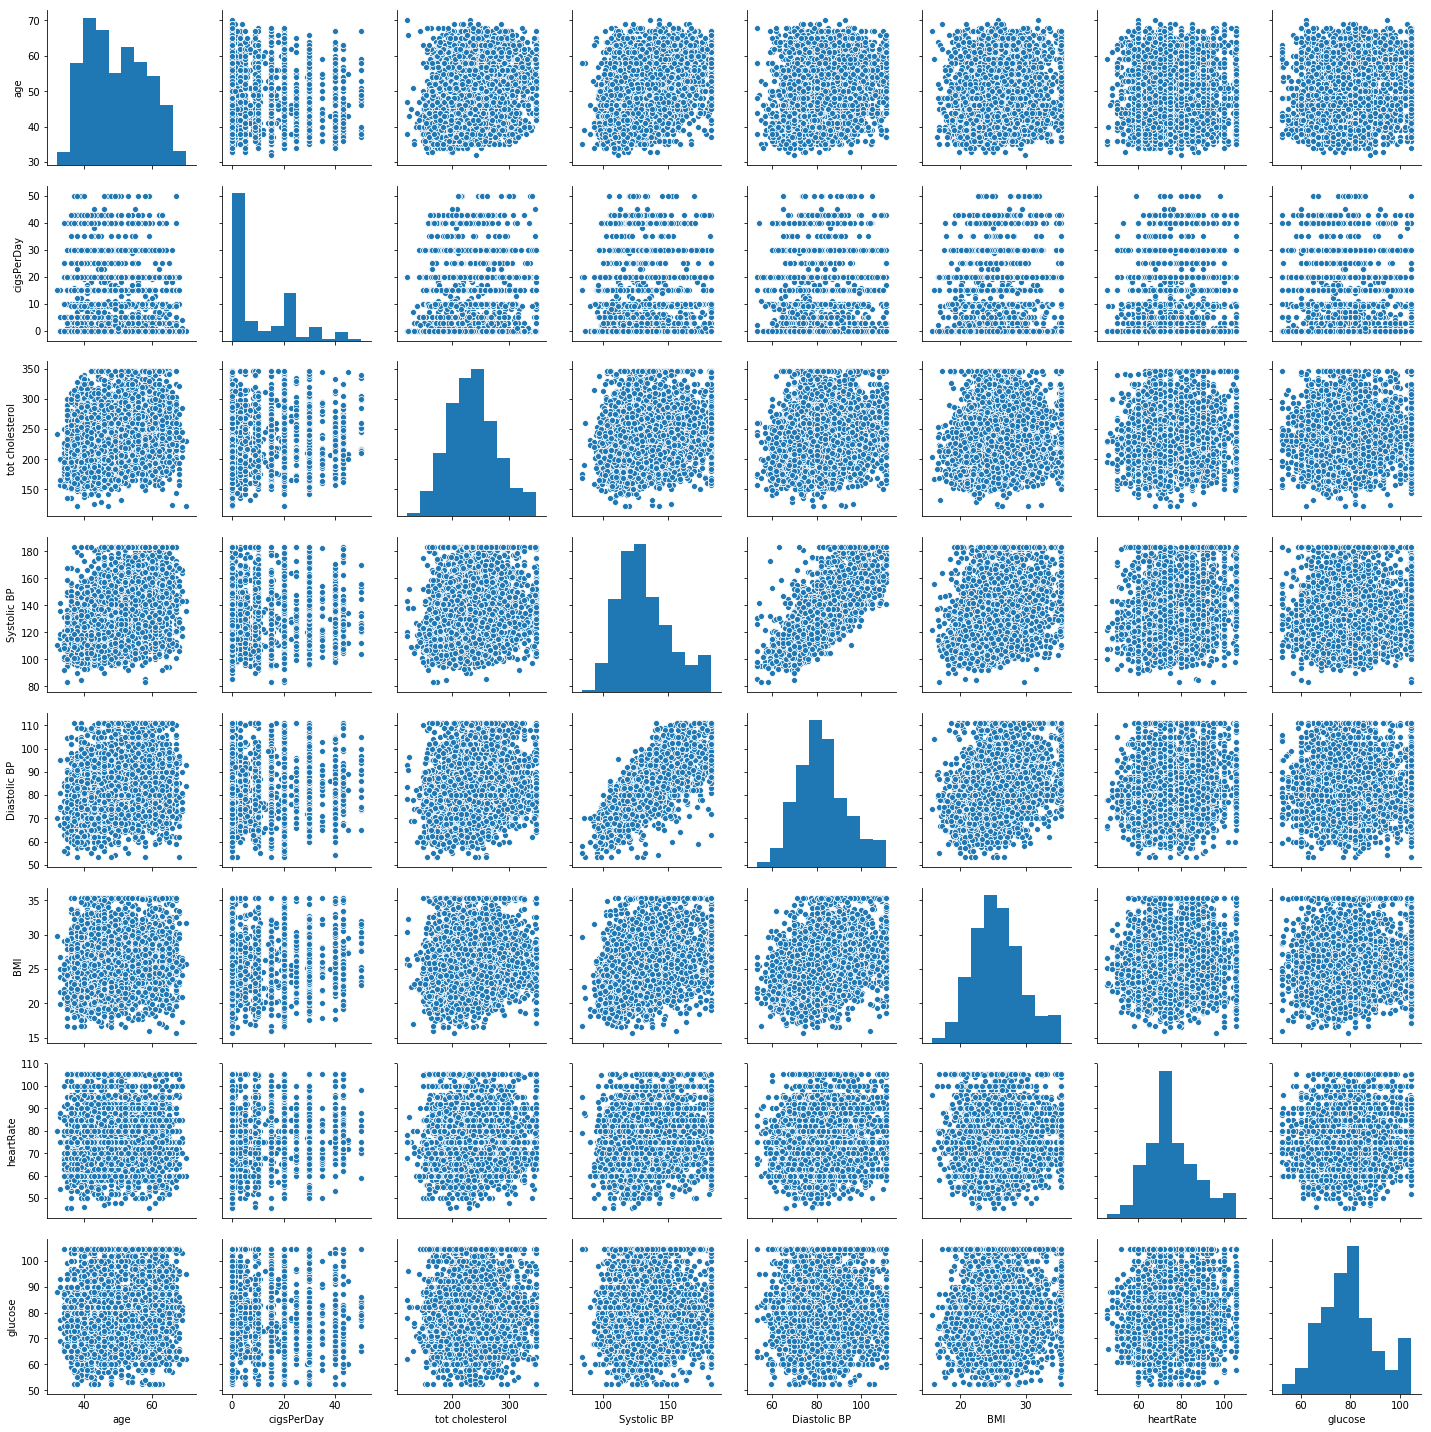

In [21]:
sns.pairplot(chd_df[['age', 'cigsPerDay', 'tot cholesterol', 'Systolic BP', 'Diastolic BP','BMI','heartRate','glucose']])

### Checking for Correlations

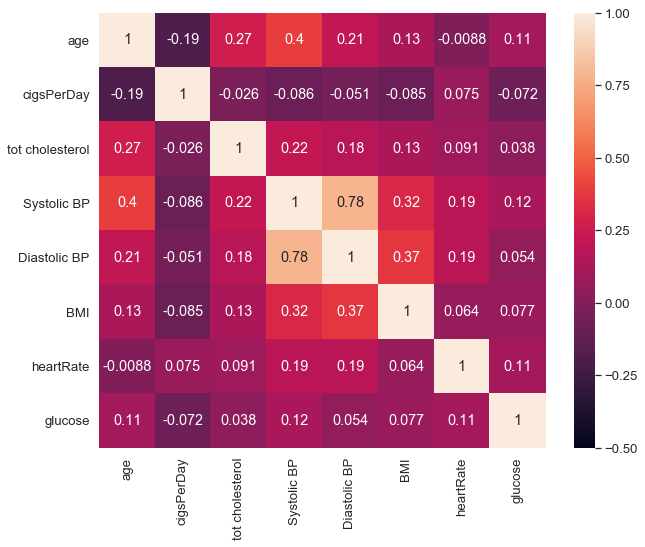

In [22]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)





In [23]:
chd_df.head(10)

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,Female,43.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,Female,63.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,Female,45.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,Male,52.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,Male,43.0,1.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,162.0,107.0,23.61,93.0,88.0,0


   
      
Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 
The following code loops through each column and checks if the column type is object then converts those columns into  categorical with each distinct value becoming a category or code.

In [24]:
for feature in chd_df.columns: 
    if chd_df[feature].dtype == 'object':
        chd_df[feature] = pd.Categorical(chd_df[feature]).codes 

In [25]:
chd_df.head(10)

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,1,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43.0,1.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,162.0,107.0,23.61,93.0,88.0,0


Female converted to 0, and Male to 1

In [26]:
chd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4055 entries, 0 to 4239
Data columns (total 16 columns):
Gender             4055 non-null int8
age                4055 non-null float64
education          4055 non-null float64
currentSmoker      4055 non-null float64
cigsPerDay         4055 non-null float64
BP Meds            4055 non-null float64
prevalentStroke    4055 non-null float64
prevalentHyp       4055 non-null float64
diabetes           4055 non-null float64
tot cholesterol    4055 non-null float64
Systolic BP        4055 non-null float64
Diastolic BP       4055 non-null float64
BMI                4055 non-null float64
heartRate          4055 non-null float64
glucose            4055 non-null float64
Heart-Att          4055 non-null int64
dtypes: float64(14), int64(1), int8(1)
memory usage: 670.8 KB


### Capture the target column into separate vectors for training set and test set

In [27]:
X = chd_df.drop(["Heart-Att"], axis=1)

y = chd_df.pop("Heart-Att")

### Splitting data into training and test set

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)


In [29]:
train_labels.value_counts()

0    2424
1     414
Name: Heart-Att, dtype: int64

In [30]:
train_labels.value_counts(normalize=True)

0    0.854123
1    0.145877
Name: Heart-Att, dtype: float64

In [31]:
test_labels.value_counts()

0    1022
1     195
Name: Heart-Att, dtype: int64

In [32]:
test_labels.value_counts(normalize=True)

0    0.83977
1    0.16023
Name: Heart-Att, dtype: float64

Observations are almost equally distributed between the train and test sets w.r.t target classes

# Ensemble RandomForest Classifier

#### Building the Random Forest model

In [33]:
#Build a RandomForestCassifier wit n_estimators 100, max_features 6, andfit it on the training data





In [34]:
rfcl

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

##### Predicting Train and Test data with the RF Model

In [35]:
ytrain_predict = rfcl.predict(X_train)
ytest_predict = rfcl.predict(X_test)

#### Evaluating model performance with confusion matrix

In [36]:
from sklearn.metrics import confusion_matrix,classification_report

#### Evaluating model performance on the training data

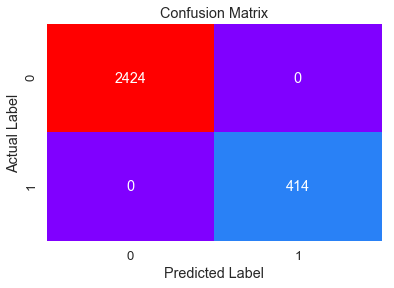

In [37]:
# Get the confusion matrix on the train data
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [38]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2424
           1       1.00      1.00      1.00       414

   micro avg       1.00      1.00      1.00      2838
   macro avg       1.00      1.00      1.00      2838
weighted avg       1.00      1.00      1.00      2838



In [39]:
print('Accuracy', ((2424+414)/(2424+414)))
print('Sensitivity',((414/414))) #TP/Actual yes
print('Specificity',(2424/2424)) #TN/Actual no
print('Precision',(414/414)) #TP/Predicted yes

Accuracy 1.0
Sensitivity 1.0
Specificity 1.0
Precision 1.0


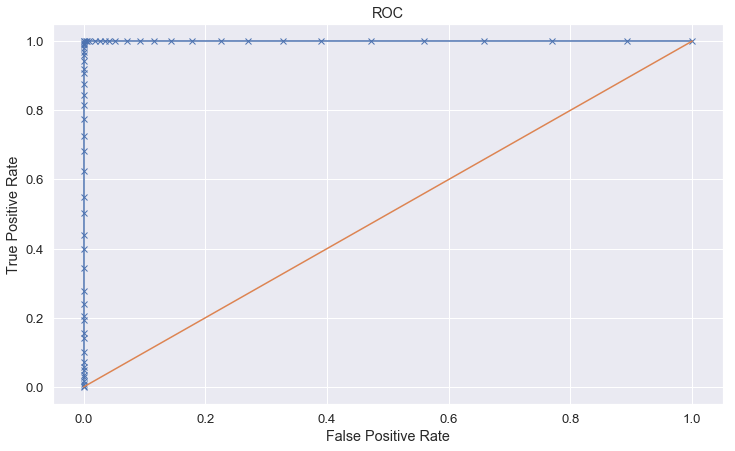

Area under Curve is 1.0


In [40]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(train_labels,rfcl.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(train_labels,rfcl.predict_proba(X_train)[:,1]))

#### Evaluating model performance on the test data

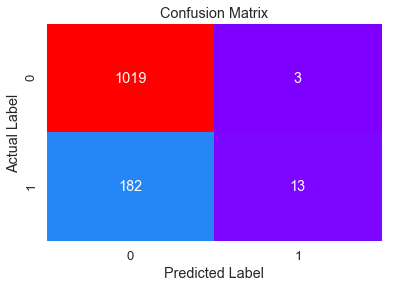

In [41]:
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [42]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1022
           1       0.81      0.07      0.12       195

   micro avg       0.85      0.85      0.85      1217
   macro avg       0.83      0.53      0.52      1217
weighted avg       0.84      0.85      0.79      1217



In [43]:
print('Accuracy', ((1019+13)/(1019+3+182+13)))
print('Sensitivity',((13/(13+182)))) 
print('Specificity',(1019/(1019+3)))
print('Precision',(13/(13+3)))

Accuracy 0.847986852917009
Sensitivity 0.06666666666666667
Specificity 0.99706457925636
Precision 0.8125


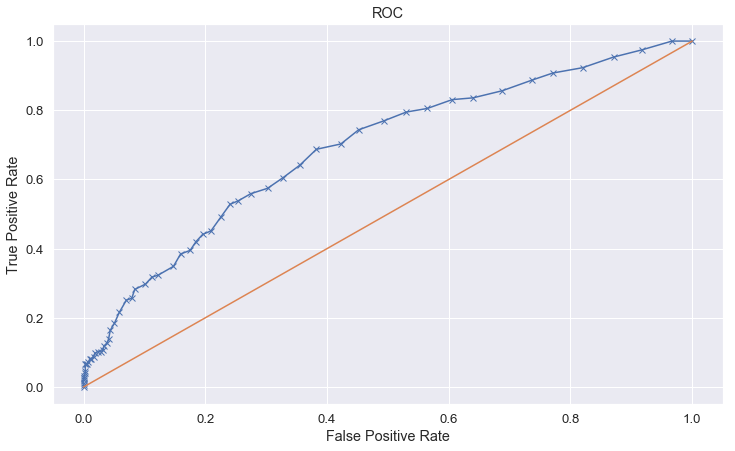

Area under Curve is 0.5318656229615134


In [44]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(test_labels,rfcl.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(test_labels,rfcl.predict(X_test)))

# Result:

Area under the curve on the training data is 100%, which indicates very high performance that all classes have been correctly classified. Whereas on the test data model performance is average with AUC 53%, which is almost half the performance of the training data.  
  

Since we are building a model to predict if a person will have a heart disease or not, for practical purposes, we will be more interested in correctly classifying 1 (having heart disease) than 0(not having heart disease). 

If a person not having a heart disease, is incorrectly predicted to have a heart disease, in this situation, the cost and other impact to life is less severe, than when we incorrectly predict a person, who actually have a heart disease, as not having a heart disease.

From the Random Forest model,looking at the Accuracy,Sensitivity,Speficity,Recall and AUC, we have 100% results on the training data, whereas on the Test data, performance is lesser,especially in predicting Class 1.  
 
This is because overfitting has happened on the training data, and therefore the model is weak in generalizing and predicting any new data.

In this model, we have hard-coded the hyper parameter values. We can optimize/fine-tune the random forest model, by trying different values for the hyper parameters to see if the model performance is improving.

### Grid Search for finding out the optimal values for the hyper parameters

Note: runs for longer time on more data with more params

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,7,10],
    'max_features': [4,6],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [100,200,300]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [46]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [5, 7, 10], 'max_features': [4, 6], 'min_samples_leaf': [5, 10], 'min_samples_split': [50, 100], 'n_estimators': [100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [47]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 300}

In [48]:
best_grid = grid_search.best_estimator_

In [49]:
best_grid

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

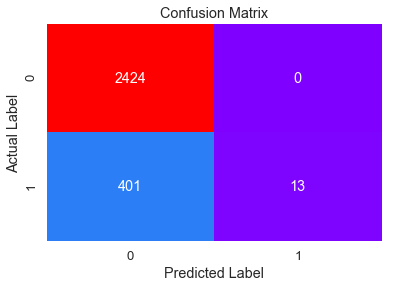

In [51]:
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [52]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2424
           1       1.00      0.03      0.06       414

   micro avg       0.86      0.86      0.86      2838
   macro avg       0.93      0.52      0.49      2838
weighted avg       0.88      0.86      0.80      2838



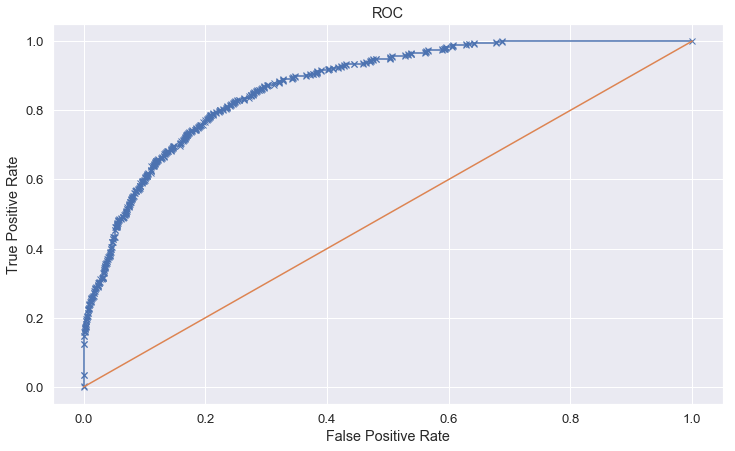

Area under Curve is 0.5157004830917874


In [53]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(train_labels,best_grid.predict(X_train)))

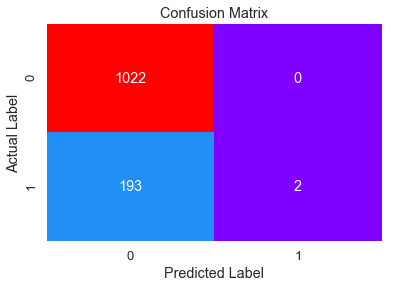

In [54]:
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [55]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1022
           1       1.00      0.01      0.02       195

   micro avg       0.84      0.84      0.84      1217
   macro avg       0.92      0.51      0.47      1217
weighted avg       0.87      0.84      0.77      1217



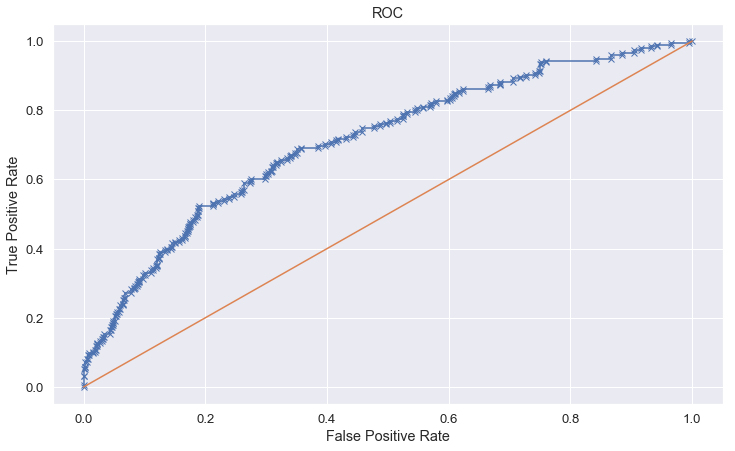

Area under Curve is 0.5051282051282051


In [56]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(test_labels,best_grid.predict(X_test)))

# Final Conclusion:

Here, we can see that even when we try other values for the hyper parameters, the model performance is not improving much. 

AUC is almost 50% in both the cases. The problem of overfitting is mildly addressed, as the results are almost same between the train and test set. But still, the model is useful only in predicting class 0, and not class 1.

This is because, the dataset is unbalanced, and so we have a class imbalance problem.

In the real world datasets, most of the time you will come across unbalanced datasets. To build a more robust classification model, this class imbalance needs to be addressed before building the model. This will be applicable to any kind of classification model. Once this issue is addressed and the model is built, further model tuning/optimization using grid search will result in improved performance. 
 
You will learn to deal with such imbalance in data using different performance improvement methods in the Machine Learning Course.
